In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [102]:
emp_df = pd.read_csv("./WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [103]:
pd.options.display.max_columns=50

In [104]:
emp_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [105]:
emp_df.shape

(1470, 35)

In [106]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [107]:
emp_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [108]:
emp_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


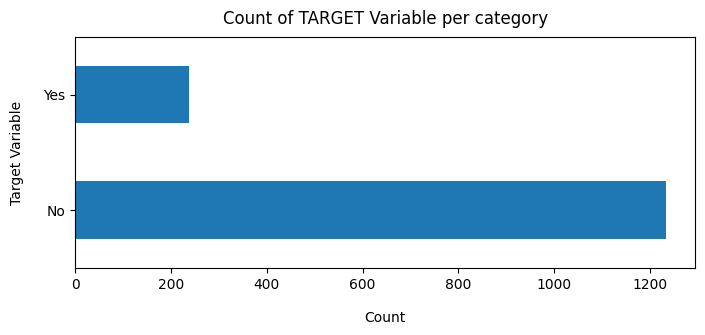

In [109]:
#For classification problems, always have a look at the ratio of the output categories.
emp_df['Attrition'].value_counts().plot(kind='barh', figsize=(8, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [110]:
#percetage of values in each category
100*emp_df['Attrition'].value_counts()/len(emp_df['Attrition'])

Attrition
No     83.877551
Yes    16.122449
Name: count, dtype: float64

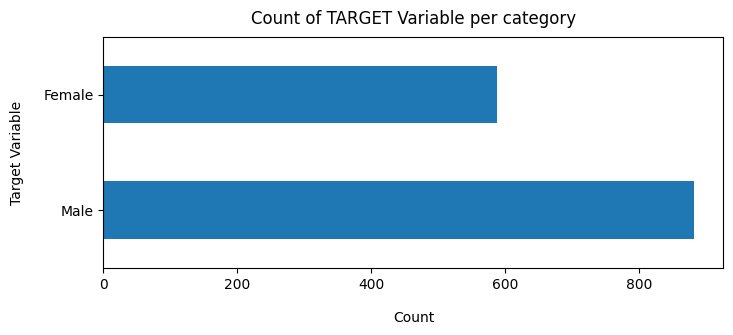

In [111]:
#For classification problems, always have a look at the ratio of the output categories.
emp_df['Gender'].value_counts().plot(kind='barh', figsize=(8, 3))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [112]:
emp_df_copy = emp_df.copy()

In [113]:
emp_df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [114]:
emp_df_copy['Attrition']=emp_df_copy['Attrition'].replace(['Yes', 'No'], [1,0]) 
emp_df_copy['Attrition']=emp_df_copy['Attrition'].astype('category')

In [115]:
emp_df_copy.drop_duplicates()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


<AxesSubplot:xlabel='Age', ylabel='Density'>

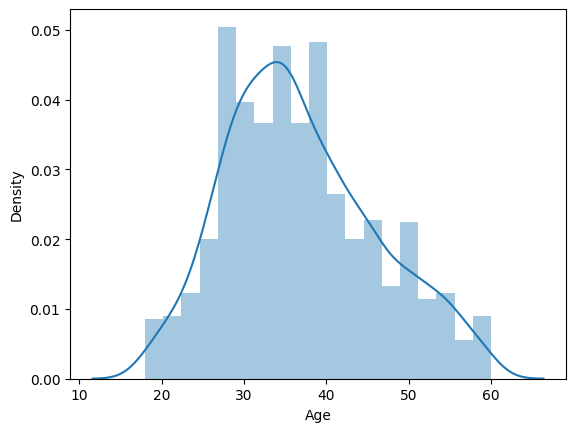

In [116]:
sns.distplot(emp_df_copy['Age'])

<Figure size 2400x2000 with 0 Axes>

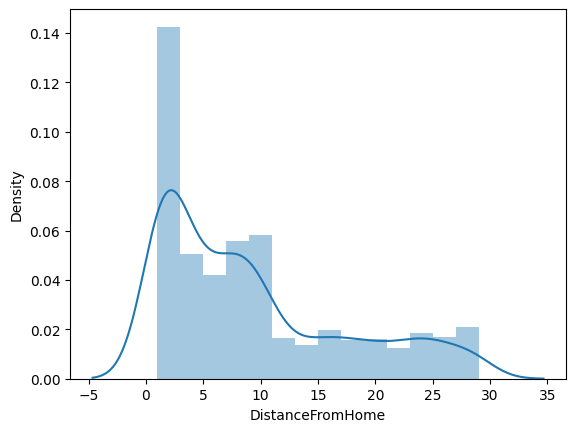

<Figure size 2400x2000 with 0 Axes>

In [117]:
ax = sns.distplot(emp_df_copy["DistanceFromHome"])
plt.figure(figsize=(24,20))


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

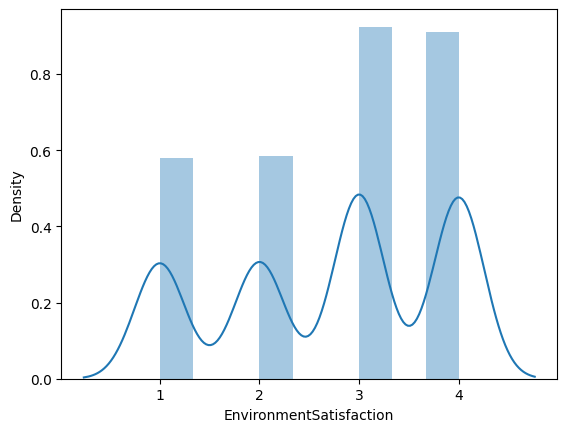

In [118]:
sns.distplot(emp_df_copy["EnvironmentSatisfaction"])

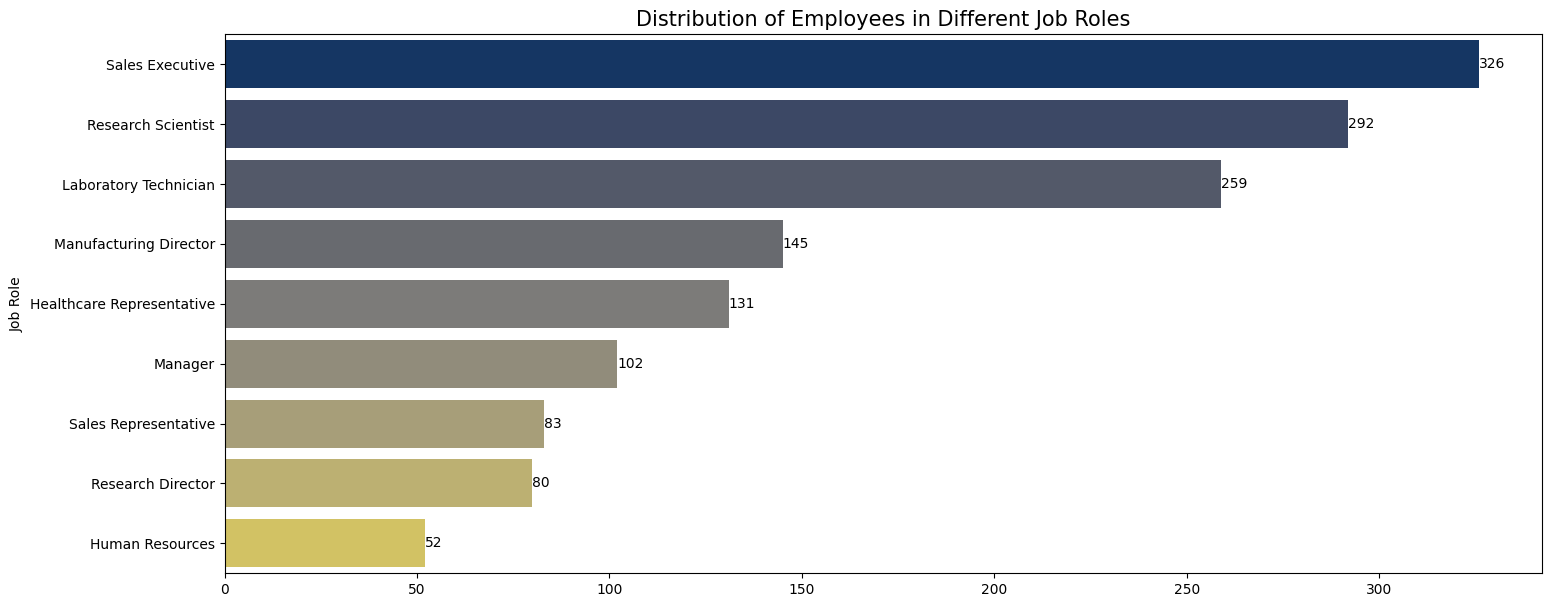

In [119]:
plt.figure(figsize=(17, 7))
ax = sns.countplot(y = emp_df_copy['JobRole'], palette = 'cividis', orient = 'v')

for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('')
plt.ylabel('Job Role')
plt.title('Distribution of Employees in Different Job Roles', fontsize = 15)


plt.show()

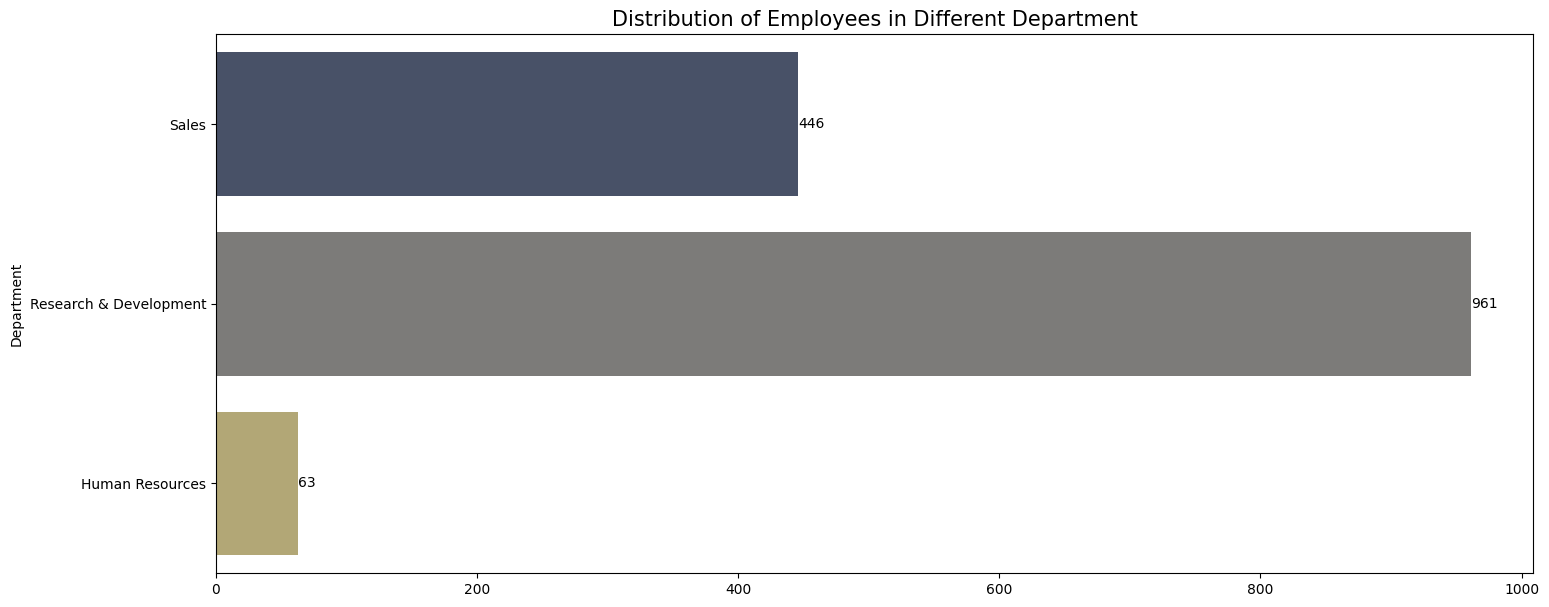

In [120]:
plt.figure(figsize=(17, 7))
ax = sns.countplot(y = emp_df_copy['Department'], palette = 'cividis', orient = 'v')

for container in ax.containers:
    ax.bar_label(container)
    
plt.xlabel('')
plt.ylabel('Department')
plt.title('Distribution of Employees in Different Department', fontsize = 15)


plt.show()

In [121]:
emp_df_copy.dtypes

Age                            int64
Attrition                   category
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                      int64
EducationField                object
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                       object
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

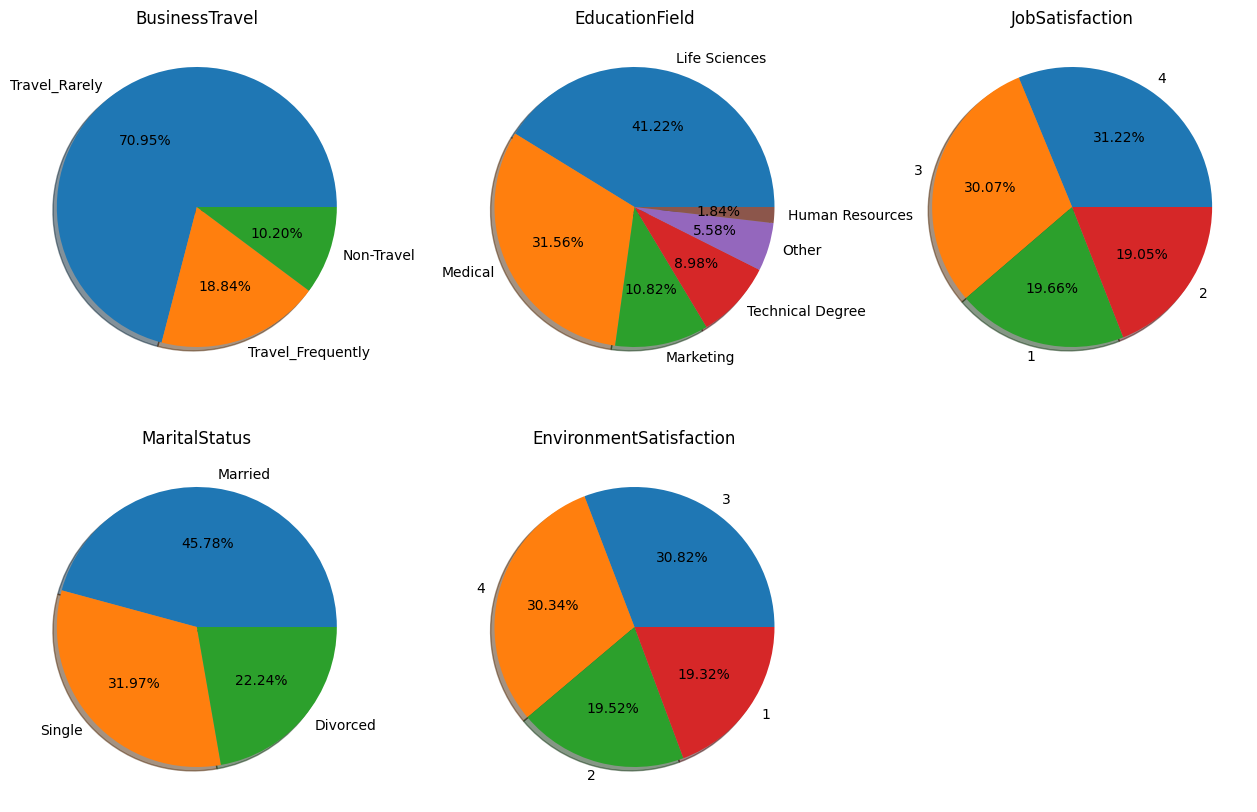

In [122]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('BusinessTravel')
emp_df_copy['BusinessTravel'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(232)
plt.axis('off')
plt.title('EducationField')
emp_df_copy['EducationField'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(233)
plt.axis('off')
plt.title('JobSatisfaction')
emp_df_copy['JobSatisfaction'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(234)
plt.axis('off')
plt.title('MaritalStatus')
emp_df_copy['MaritalStatus'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.subplot(235)
plt.axis('off')
plt.title('EnvironmentSatisfaction')
emp_df_copy['EnvironmentSatisfaction'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')

plt.show()

In [123]:
emp_df_copy["PerformanceRating"].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

*0 = No Attrition* <br>
*1 = Yes Attrition*

Text(0.5, 1.0, 'Attrition based on Age')

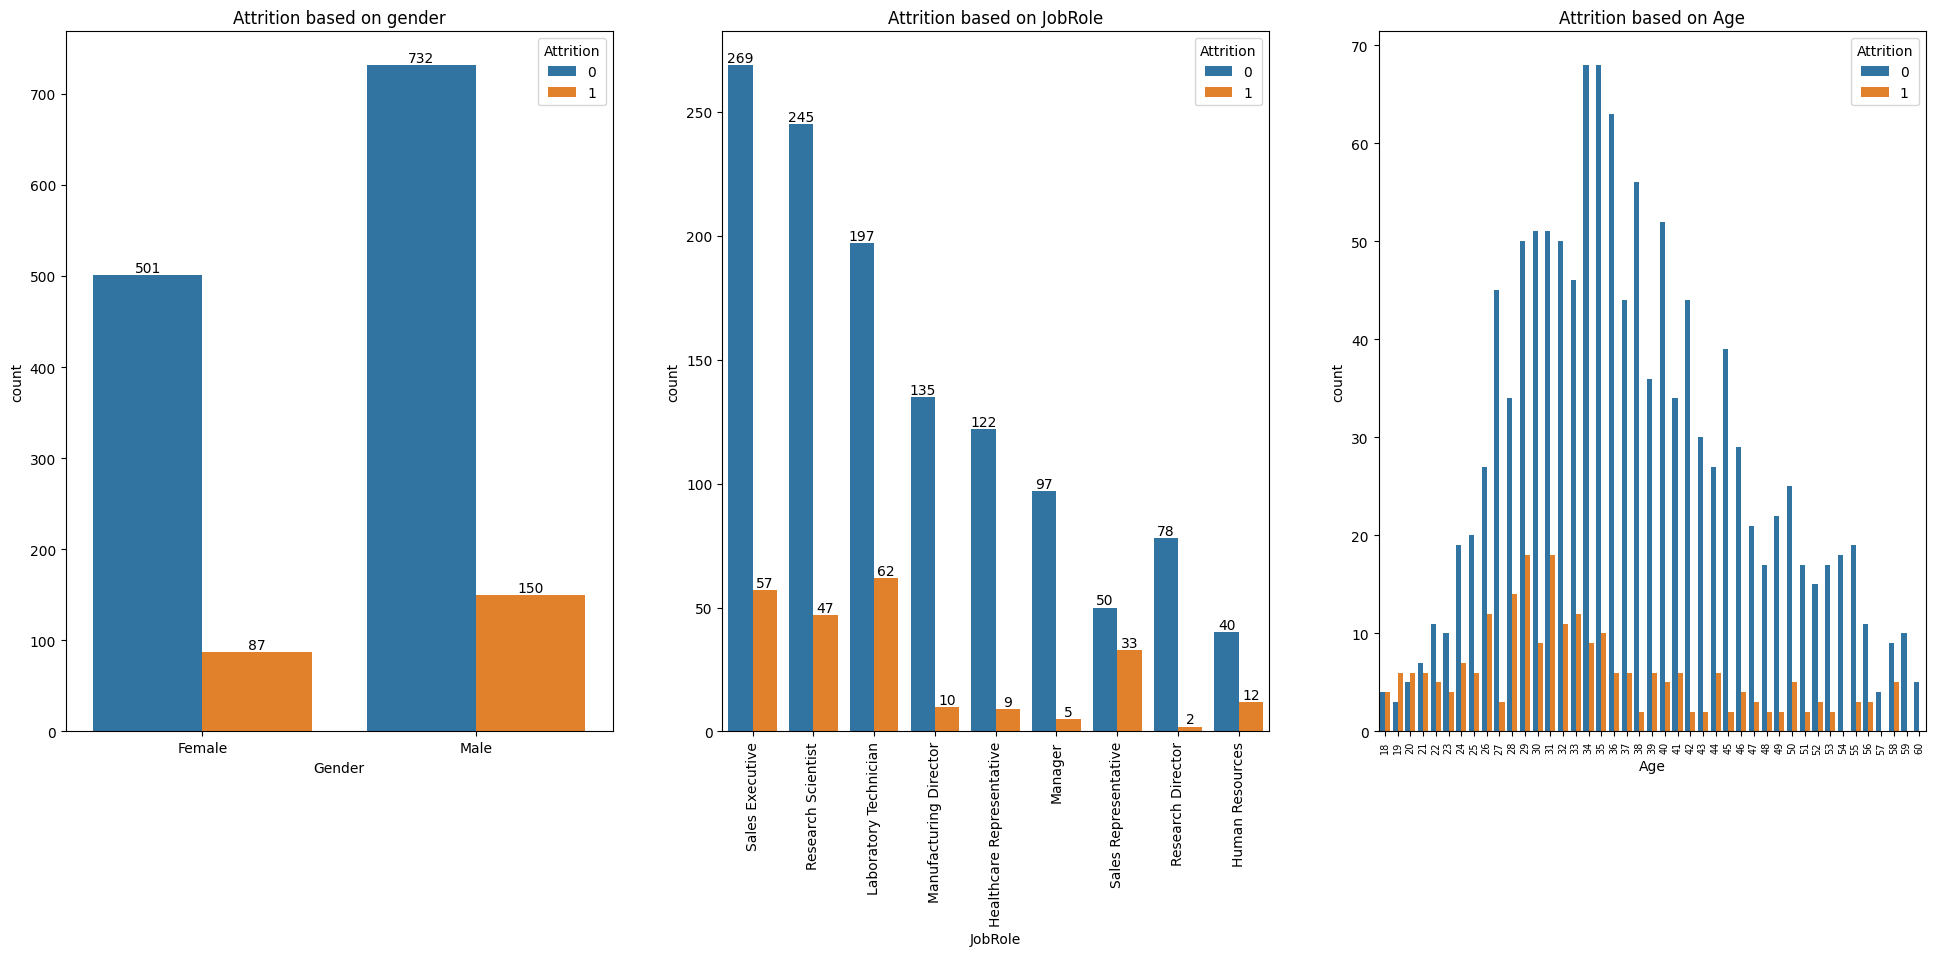

In [125]:
plt.figure(figsize=(24,20))
plt.subplot(231)
ax = sns.countplot(x=emp_df_copy['Gender'],hue=emp_df_copy['Attrition'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Attrition based on gender')

plt.subplot(232)
plt.xticks(rotation=90)
bx = sns.countplot(x=emp_df_copy['JobRole'],hue=emp_df_copy['Attrition'])

for container in bx.containers:
    bx.bar_label(container)
    
plt.title('Attrition based on JobRole')

plt.subplot(233)
sns.countplot(x=emp_df_copy['Age'],hue=emp_df_copy['Attrition'])
plt.xticks(rotation=90, fontsize = 7)
plt.title('Attrition based on Age')


Text(0.5, 1.0, 'Gender vs Age')

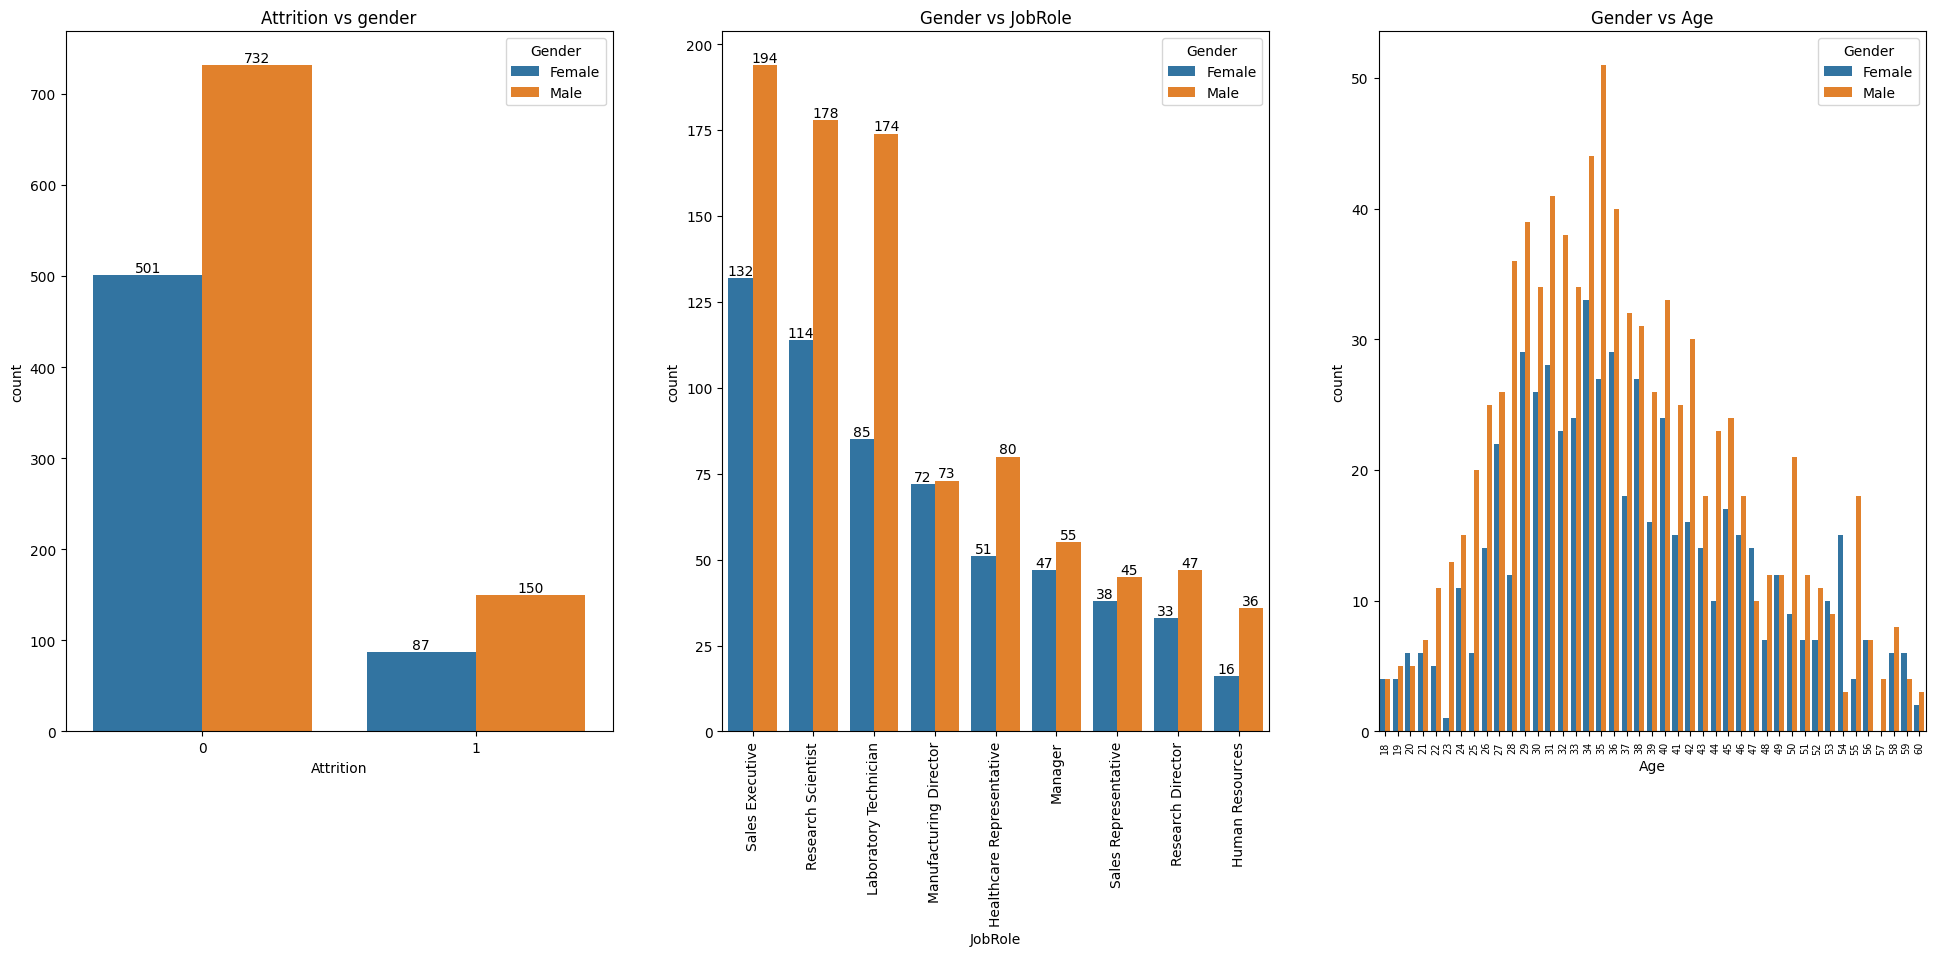

In [126]:
plt.figure(figsize=(24,20))
plt.subplot(231)
ax = sns.countplot(x=emp_df_copy['Attrition'],hue=emp_df_copy['Gender'])

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Attrition vs gender')

plt.subplot(232)
plt.xticks(rotation=90)
bx = sns.countplot(x=emp_df_copy['JobRole'],hue=emp_df_copy['Gender'])

for container in bx.containers:
    bx.bar_label(container)
    
plt.title('Gender vs JobRole')

plt.subplot(233)
sns.countplot(x=emp_df_copy['Age'],hue=emp_df_copy['Gender'])
plt.xticks(rotation=90, fontsize = 7)
plt.title('Gender vs Age')


In [127]:
emp_df_copy['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [128]:
lb = LabelEncoder()
emp_df_copy['JobRole']=lb.fit_transform(emp_df_copy['JobRole'])

In [129]:
emp_df_copy['JobRole'].value_counts()

JobRole
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: count, dtype: int64

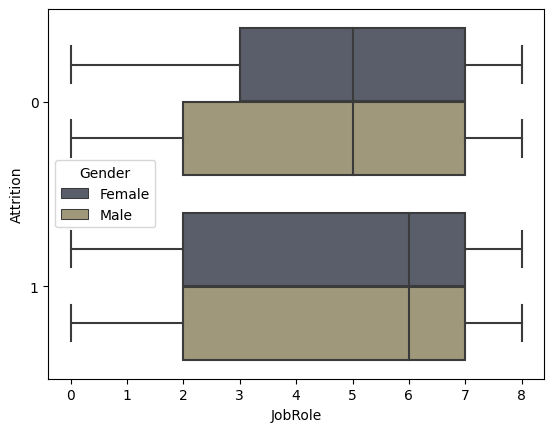

In [130]:
ax = sns.boxplot(x=emp_df_copy['JobRole'],y=emp_df_copy['Attrition'],hue=emp_df_copy['Gender'], palette='cividis')

<Figure size 500x1000 with 0 Axes>

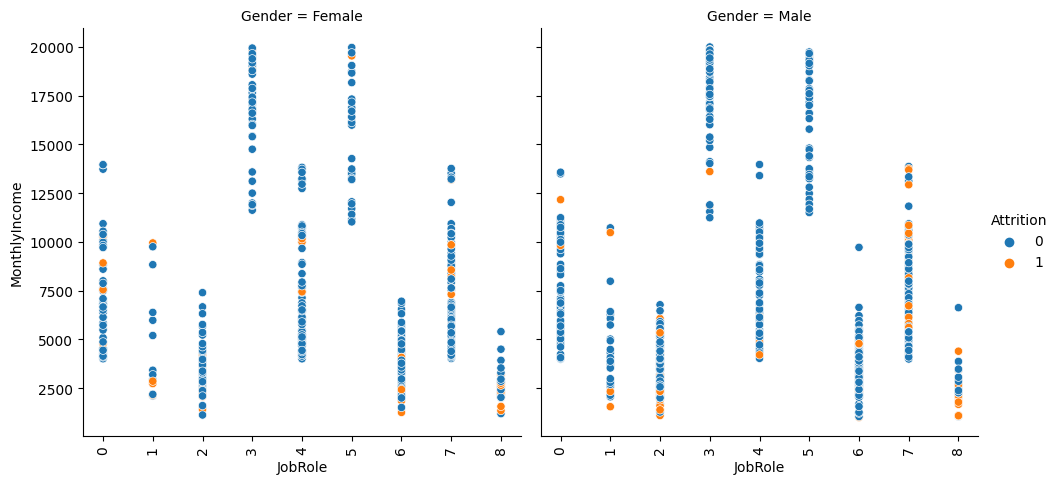

In [131]:
plt.figure(figsize=(5,10))
ax = sns.relplot(data = emp_df_copy,y='MonthlyIncome', x='JobRole', hue='Attrition', col='Gender')
rotation = 90
for i , ax in enumerate (ax.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)

plt.show()

In [132]:
emp_df_copy['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

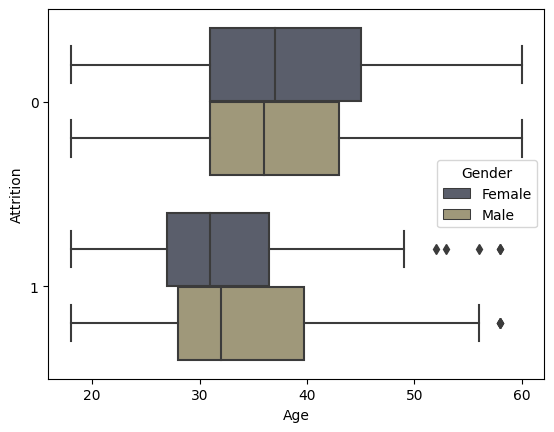

In [30]:
sns.boxplot(x=emp_df_copy['Age'],y=emp_df_copy['Attrition'],hue=emp_df_copy['Gender'], palette='cividis')

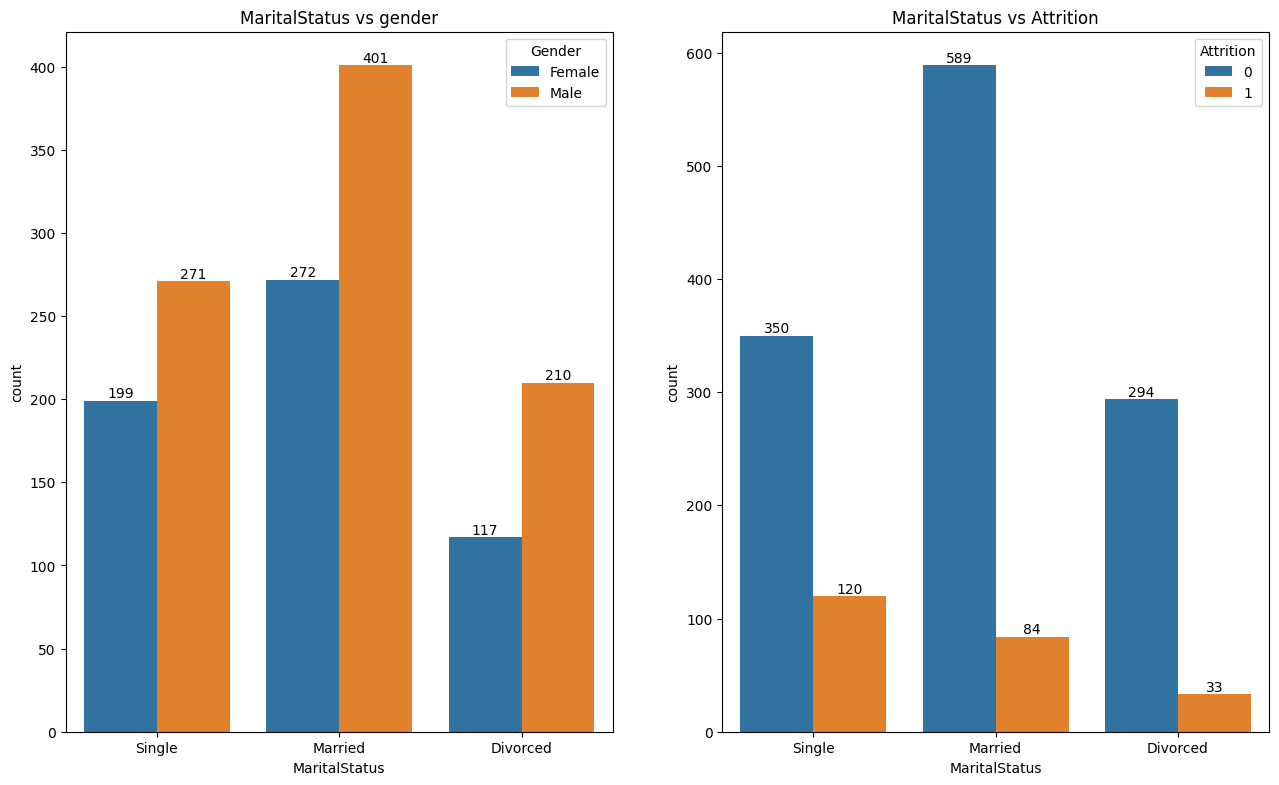

In [31]:
plt.figure(figsize=(24,20))

plt.subplot(231)
ax= sns.countplot(x=emp_df_copy['MaritalStatus'],hue=emp_df_copy['Gender'])
plt.title('MaritalStatus vs gender')

for container in ax.containers:
    ax.bar_label(container)
    
plt.subplot(232)
bx = sns.countplot(x=emp_df_copy['MaritalStatus'],hue=emp_df_copy['Attrition'])
plt.title('MaritalStatus vs Attrition')

for container in bx.containers:
    bx.bar_label(container)


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

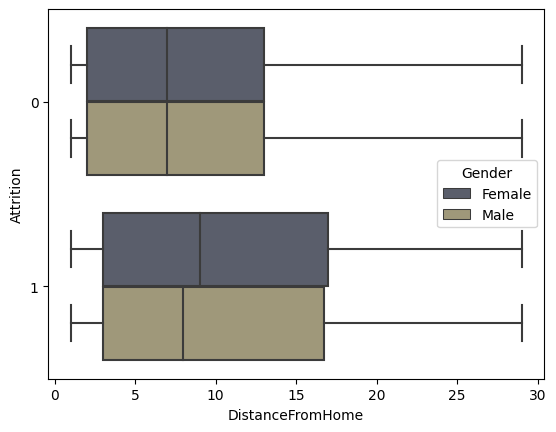

In [32]:
sns.boxplot(x=emp_df_copy['DistanceFromHome'],y=emp_df_copy['Attrition'],hue=emp_df_copy['Gender'], palette='cividis')

In [33]:
emp_df_copy['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Attrition'>

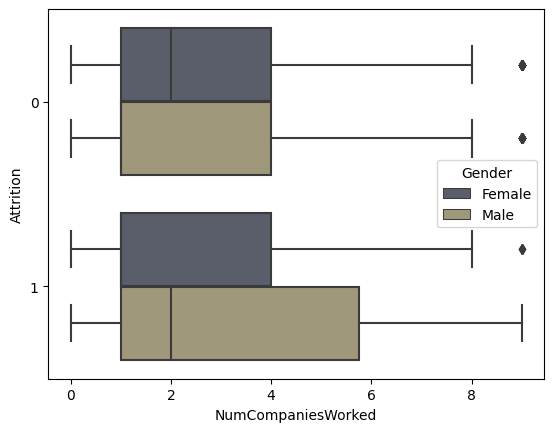

In [34]:
sns.boxplot(x=emp_df_copy['NumCompaniesWorked'],y=emp_df_copy['Attrition'],hue=emp_df_copy['Gender'], palette='cividis')

In [35]:
emp_df_copy.dtypes

Age                            int64
Attrition                   category
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                      int64
EducationField                object
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                        int32
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

<AxesSubplot:xlabel='Education', ylabel='Attrition'>

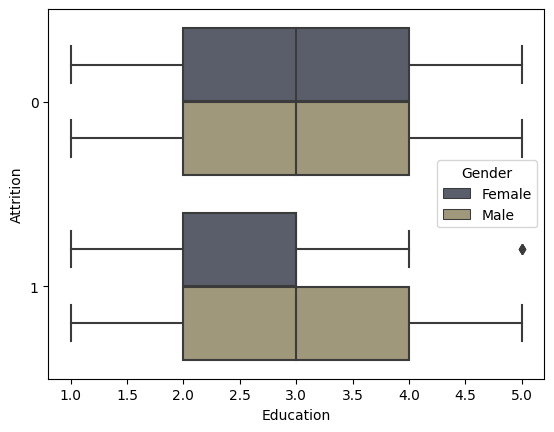

In [36]:
sns.boxplot(x=emp_df_copy['Education'],y=emp_df_copy['Attrition'],hue=emp_df_copy['Gender'], palette='cividis')

In [37]:
emp_df_copy['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

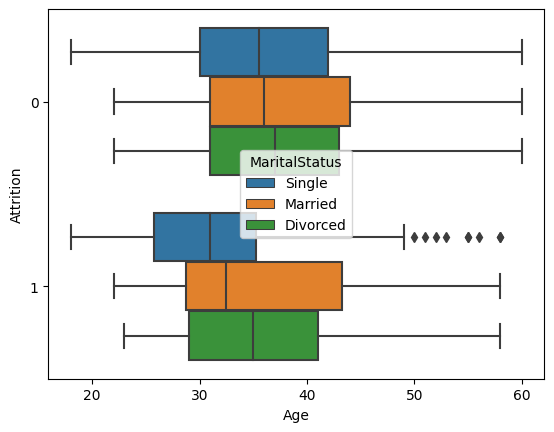

In [38]:
sns.boxplot(x=emp_df_copy['Age'], y=emp_df_copy['Attrition'], hue=emp_df_copy['MaritalStatus'])

In [39]:
emp_df_copy['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [40]:
# lb = LabelEncoder()
# emp_df_copy['BusinessTravel']=lb.fit_transform(emp_df_copy['BusinessTravel'])

In [41]:
# emp_df_copy['BusinessTravel'].value_counts()

In [42]:
# lb = LabelEncoder()
# emp_df_copy['Gender']=lb.fit_transform(emp_df_copy['Gender'])

In [43]:
# sns.boxplot(x=emp_df_copy['Gender'], y=emp_df_copy['Attrition'], hue=emp_df_copy['BusinessTravel'])

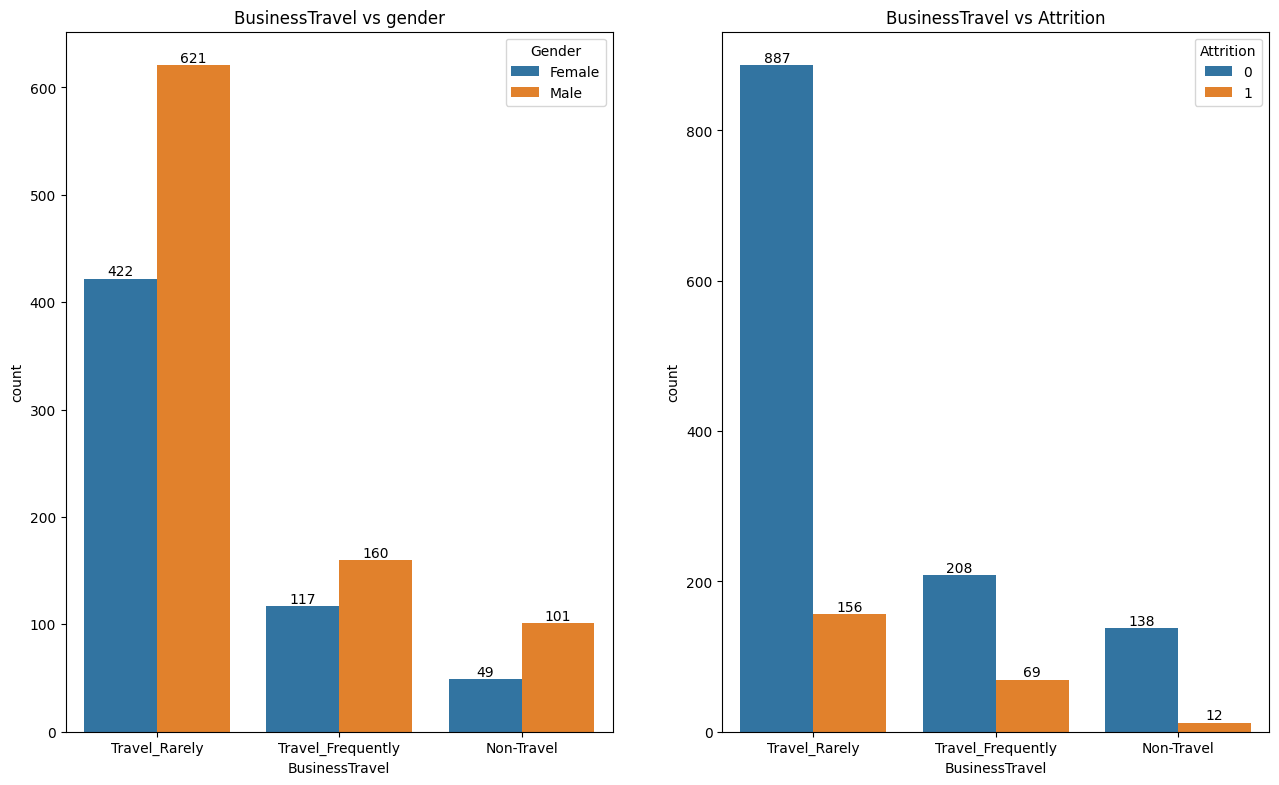

In [133]:
plt.figure(figsize=(24,20))

plt.subplot(231)
ax = sns.countplot(x=emp_df_copy['BusinessTravel'],hue=emp_df_copy['Gender'])
plt.title('BusinessTravel vs gender')

for container in ax.containers:
    ax.bar_label(container)

plt.subplot(232)
bx = sns.countplot(x=emp_df_copy['BusinessTravel'],hue=emp_df_copy['Attrition'])
plt.title('BusinessTravel vs Attrition')

for container in bx.containers:
    bx.bar_label(container)



In [134]:
emp_df_copy.dtypes

Age                            int64
Attrition                   category
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                      int64
EducationField                object
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                        int32
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Attrition'>

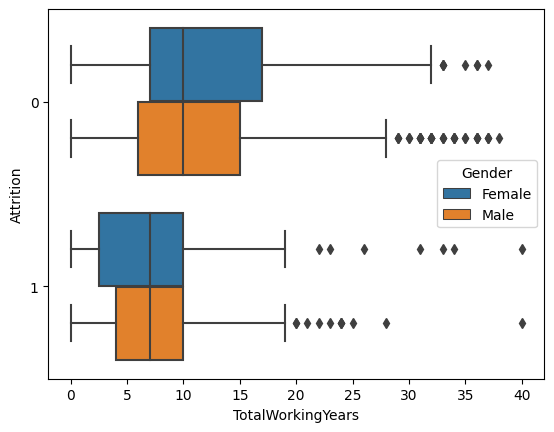

In [135]:
sns.boxplot(x=emp_df_copy['TotalWorkingYears'], y=emp_df_copy['Attrition'], hue=emp_df_copy['Gender'])

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Attrition'>

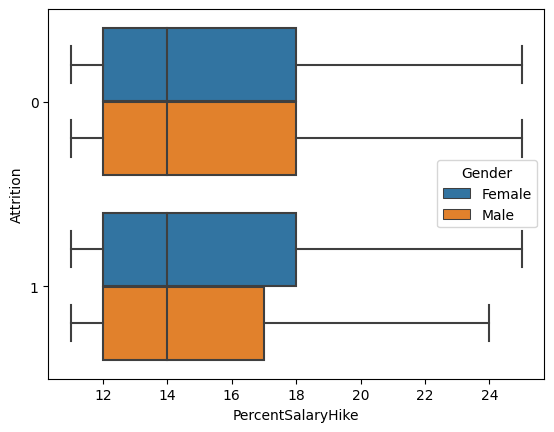

In [136]:
sns.boxplot(x=emp_df_copy['PercentSalaryHike'], y=emp_df_copy['Attrition'], hue=emp_df_copy['Gender'])

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Attrition'>

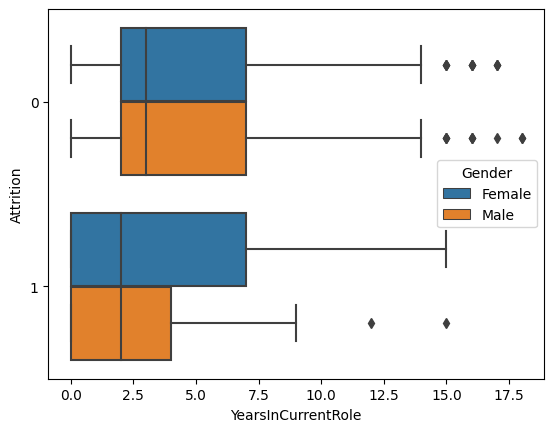

In [137]:
sns.boxplot(x=emp_df_copy['YearsInCurrentRole'], y=emp_df_copy['Attrition'], hue=emp_df_copy['Gender'])

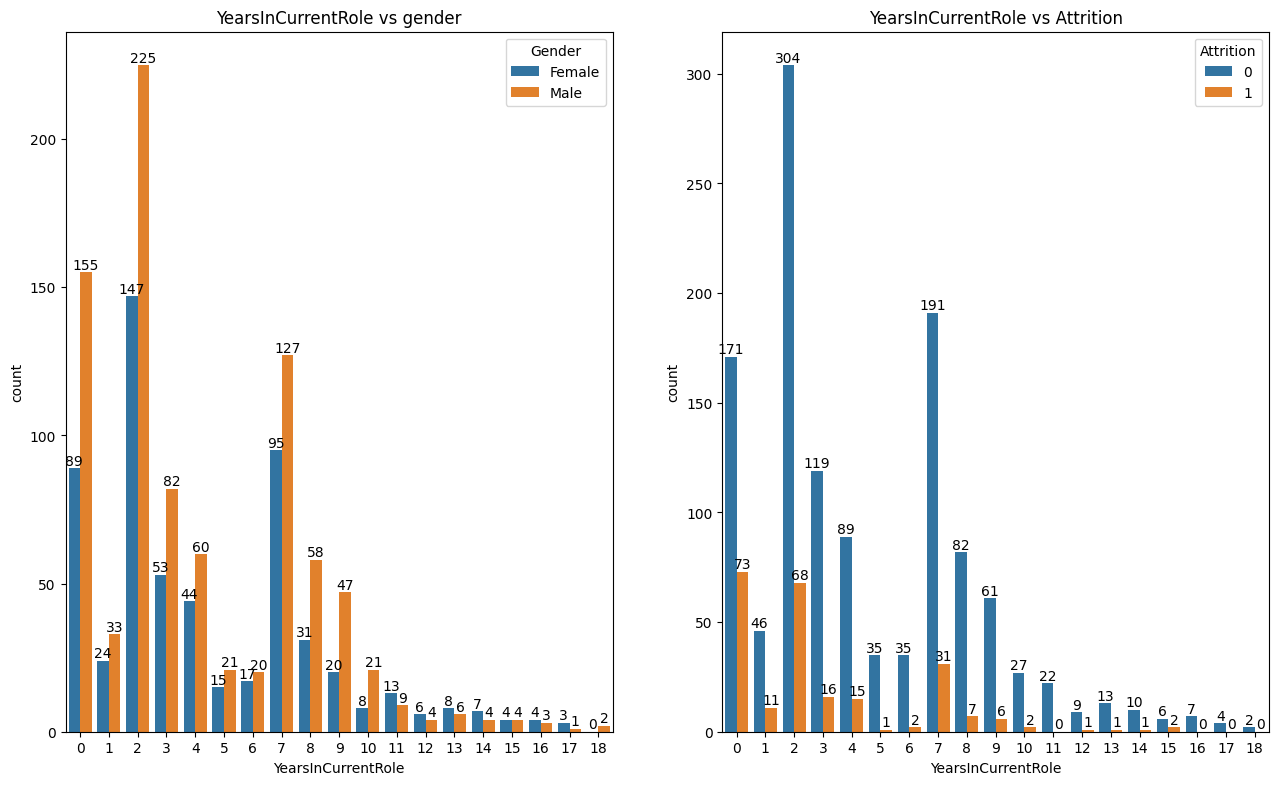

In [141]:
plt.figure(figsize=(24,20))

plt.subplot(231)
ax = sns.countplot(x=emp_df_copy['YearsInCurrentRole'],hue=emp_df_copy['Gender'])
plt.title('YearsInCurrentRole vs gender')
for container in ax.containers:
    ax.bar_label(container)


plt.subplot(232)
bx = sns.countplot(x=emp_df_copy['YearsInCurrentRole'],hue=emp_df_copy['Attrition'])
plt.title('YearsInCurrentRole vs Attrition')
for container in bx.containers:
    bx.bar_label(container)



<Figure size 500x1000 with 0 Axes>

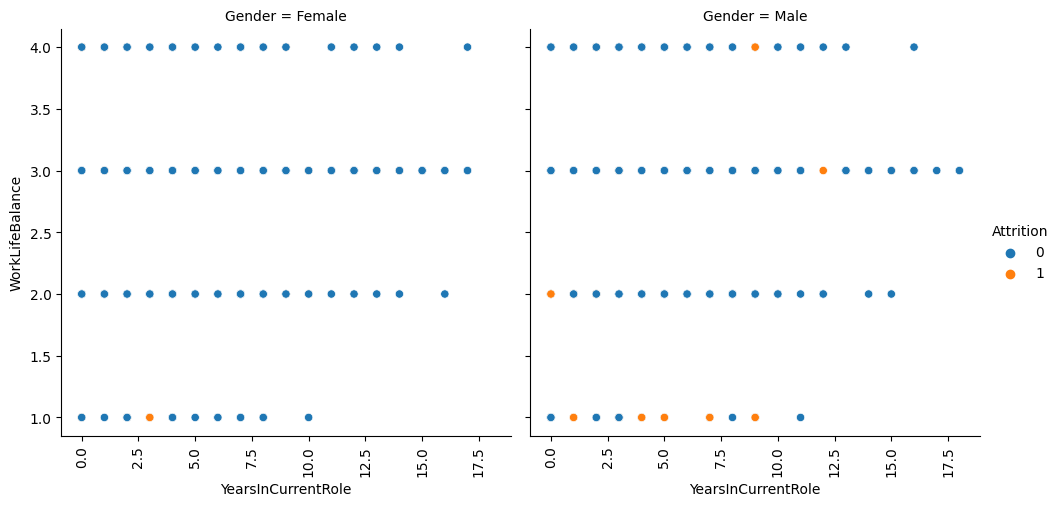

In [139]:
plt.figure(figsize=(5,10))
ax = sns.relplot(data = emp_df_copy,y='WorkLifeBalance', x='YearsInCurrentRole', hue='Attrition', col='Gender')
rotation = 90
for i , ax in enumerate (ax.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)

plt.show()

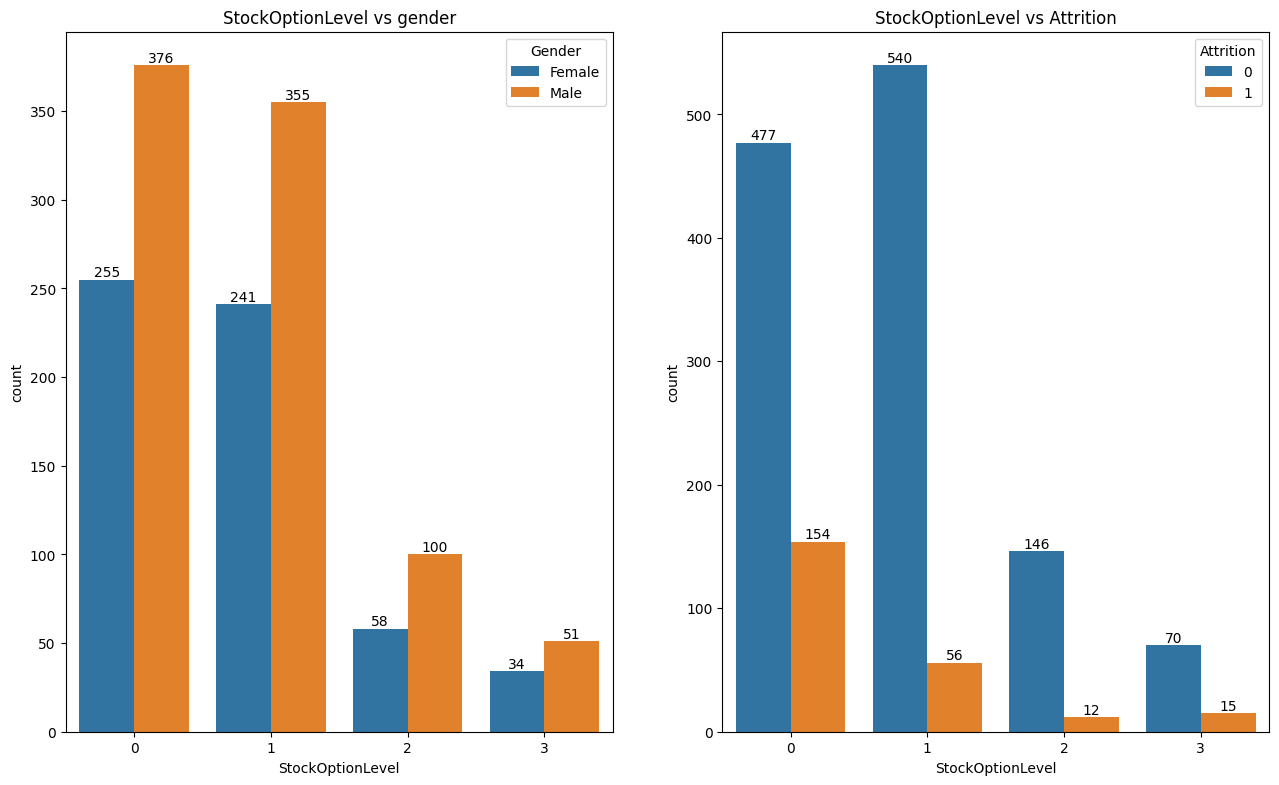

In [142]:
plt.figure(figsize=(24,20))

plt.subplot(231)
ax = sns.countplot(x=emp_df_copy['StockOptionLevel'],hue=emp_df_copy['Gender'])
plt.title('StockOptionLevel vs gender')
for container in ax.containers:
    ax.bar_label(container)


plt.subplot(232)
bx = sns.countplot(x=emp_df_copy['StockOptionLevel'],hue=emp_df_copy['Attrition'])
plt.title('StockOptionLevel vs Attrition')
for container in bx.containers:
    bx.bar_label(container)



<Figure size 500x1000 with 0 Axes>

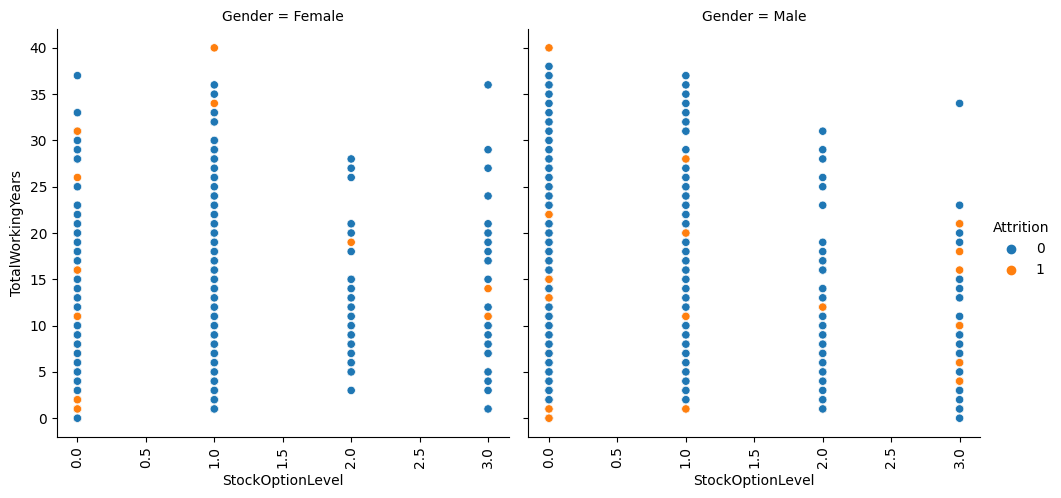

In [143]:
plt.figure(figsize=(5,10))
ax = sns.relplot(data = emp_df_copy,y='TotalWorkingYears', x='StockOptionLevel', hue='Attrition', col='Gender')
rotation = 90
for i , ax in enumerate (ax.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)

plt.show()

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Attrition'>

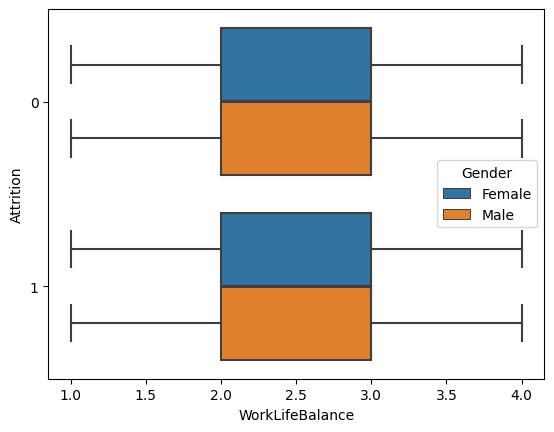

In [50]:
sns.boxplot(x=emp_df_copy['WorkLifeBalance'], y=emp_df_copy['Attrition'], hue=emp_df_copy['Gender'])

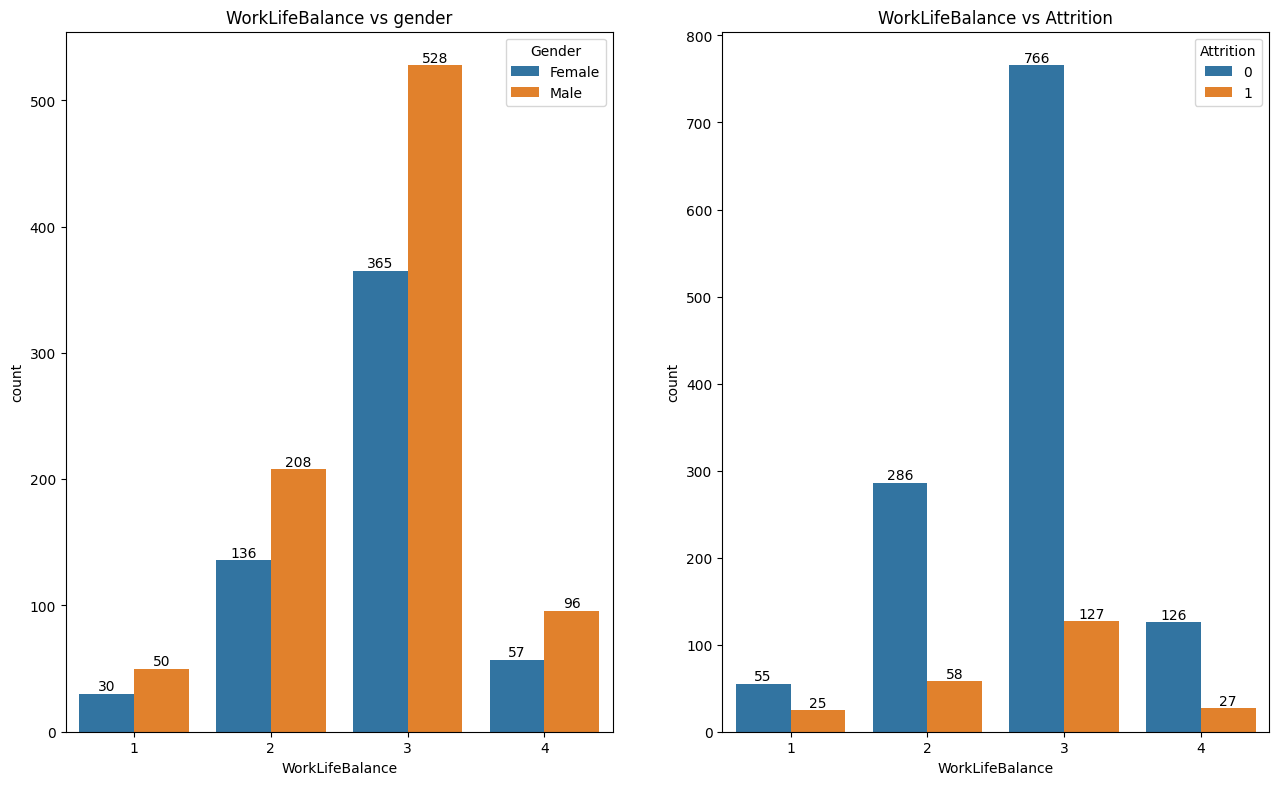

In [144]:
plt.figure(figsize=(24,20))

plt.subplot(231)
ax = sns.countplot(x=emp_df_copy['WorkLifeBalance'],hue=emp_df_copy['Gender'])
plt.title('WorkLifeBalance vs gender')
for container in ax.containers:
    ax.bar_label(container)


plt.subplot(232)
bx = sns.countplot(x=emp_df_copy['WorkLifeBalance'],hue=emp_df_copy['Attrition'])
plt.title('WorkLifeBalance vs Attrition')
for container in bx.containers:
    bx.bar_label(container)



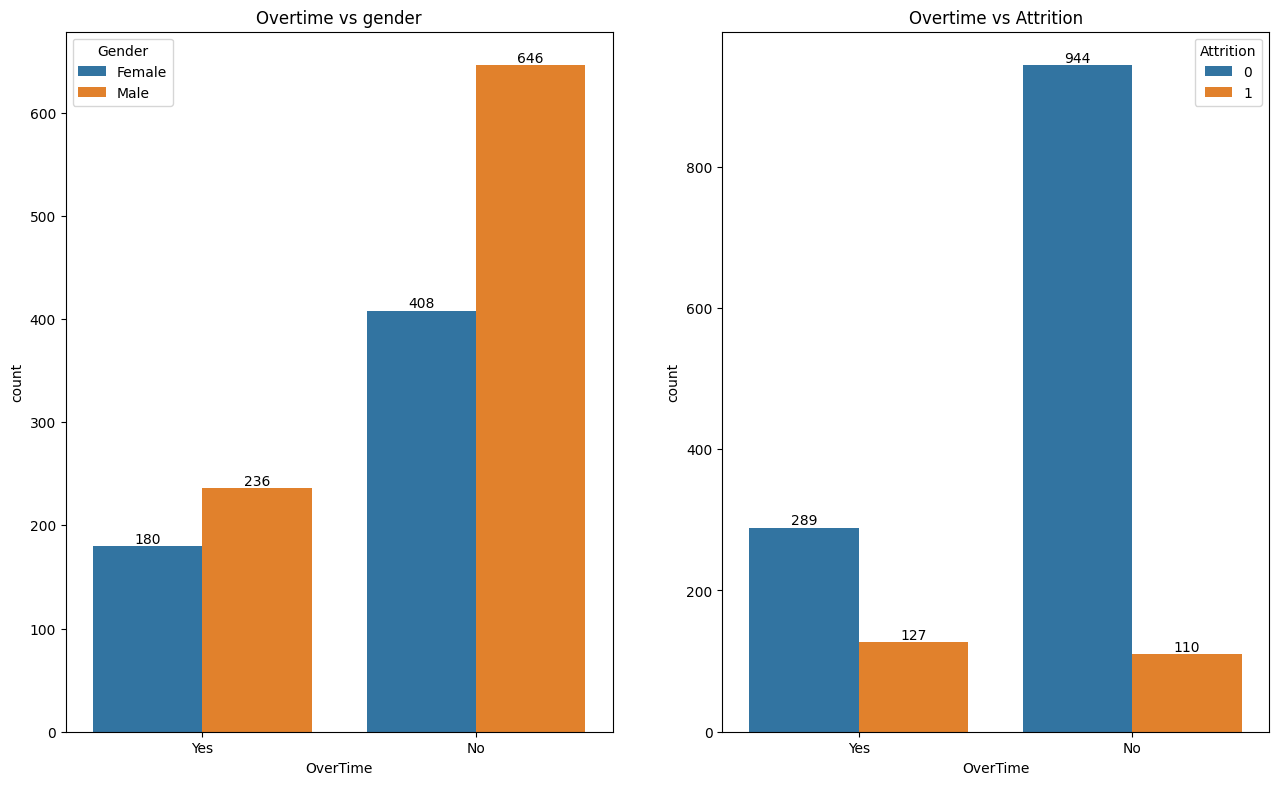

In [145]:
plt.figure(figsize=(24,20))

plt.subplot(231)
ax = sns.countplot(x=emp_df_copy['OverTime'],hue=emp_df_copy['Gender'])
plt.title('Overtime vs gender')
for container in ax.containers:
    ax.bar_label(container)


plt.subplot(232)
bx = sns.countplot(x=emp_df_copy['OverTime'],hue=emp_df_copy['Attrition'])
plt.title('Overtime vs Attrition')
for container in bx.containers:
    bx.bar_label(container)



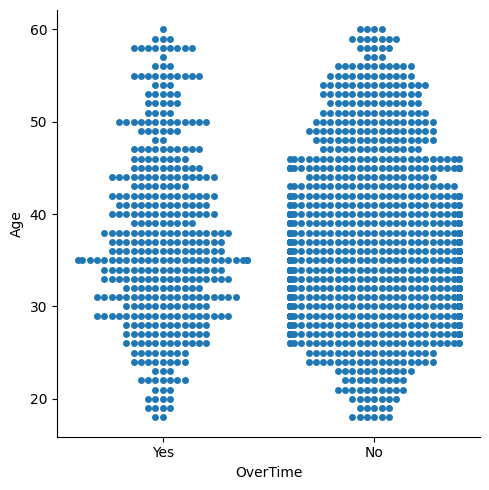

In [146]:
sns.catplot(x='OverTime', y='Age', kind='swarm', data=emp_df_copy)

Text(0.5, 1.0, 'YearsSinceLastPromotion by Attrition')

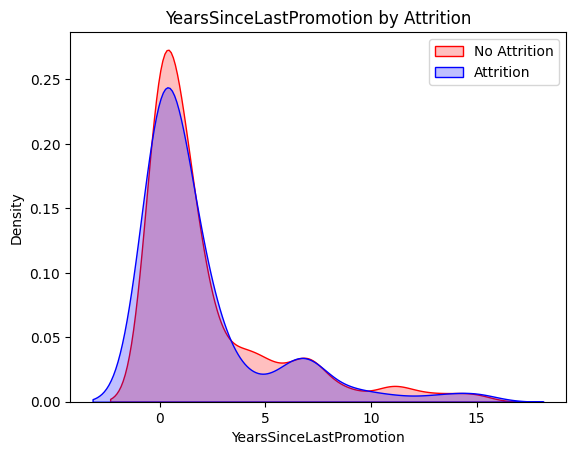

In [147]:
Yrs_lastPromo = sns.kdeplot(emp_df_copy.YearsSinceLastPromotion[(emp_df_copy["Attrition"] == 0) ],
                color="Red", fill = True)
Yrs_lastPromo = sns.kdeplot(emp_df_copy.YearsSinceLastPromotion[(emp_df_copy["Attrition"] == 1) ],
                ax =Yrs_lastPromo, color="Blue", fill = True)
Yrs_lastPromo.legend(["No Attrition","Attrition"],loc='upper right')
Yrs_lastPromo.set_ylabel('Density')
Yrs_lastPromo.set_xlabel('YearsSinceLastPromotion')
Yrs_lastPromo.set_title('YearsSinceLastPromotion by Attrition')

In [148]:
emp_df_copy['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [149]:
lb=LabelEncoder()
emp_df_copy['Gender']=lb.fit_transform(emp_df_copy['Gender'])

In [150]:
emp_df_copy['Gender'].value_counts()

Gender
1    882
0    588
Name: count, dtype: int64

Text(0.5, 1.0, 'YearsSinceLastPromotion by Gender')

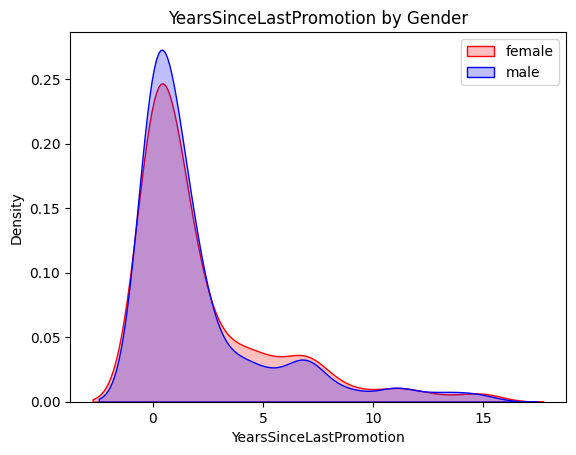

In [151]:
Yrs_lastPromoGen = sns.kdeplot(emp_df_copy.YearsSinceLastPromotion[(emp_df_copy["Gender"] == 0) ],
                color="Red", fill = True)
Yrs_lastPromoGen = sns.kdeplot(emp_df_copy.YearsSinceLastPromotion[(emp_df_copy["Gender"] == 1) ],
                ax =Yrs_lastPromoGen, color="Blue", fill = True)
Yrs_lastPromoGen.legend(["female","male"],loc='upper right')
Yrs_lastPromoGen.set_ylabel('Density')
Yrs_lastPromoGen.set_xlabel('YearsSinceLastPromotion')
Yrs_lastPromoGen.set_title('YearsSinceLastPromotion by Gender')

In [152]:
data_n=emp_df_copy[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']]

<AxesSubplot:title={'center':'Correlation of Features'}>

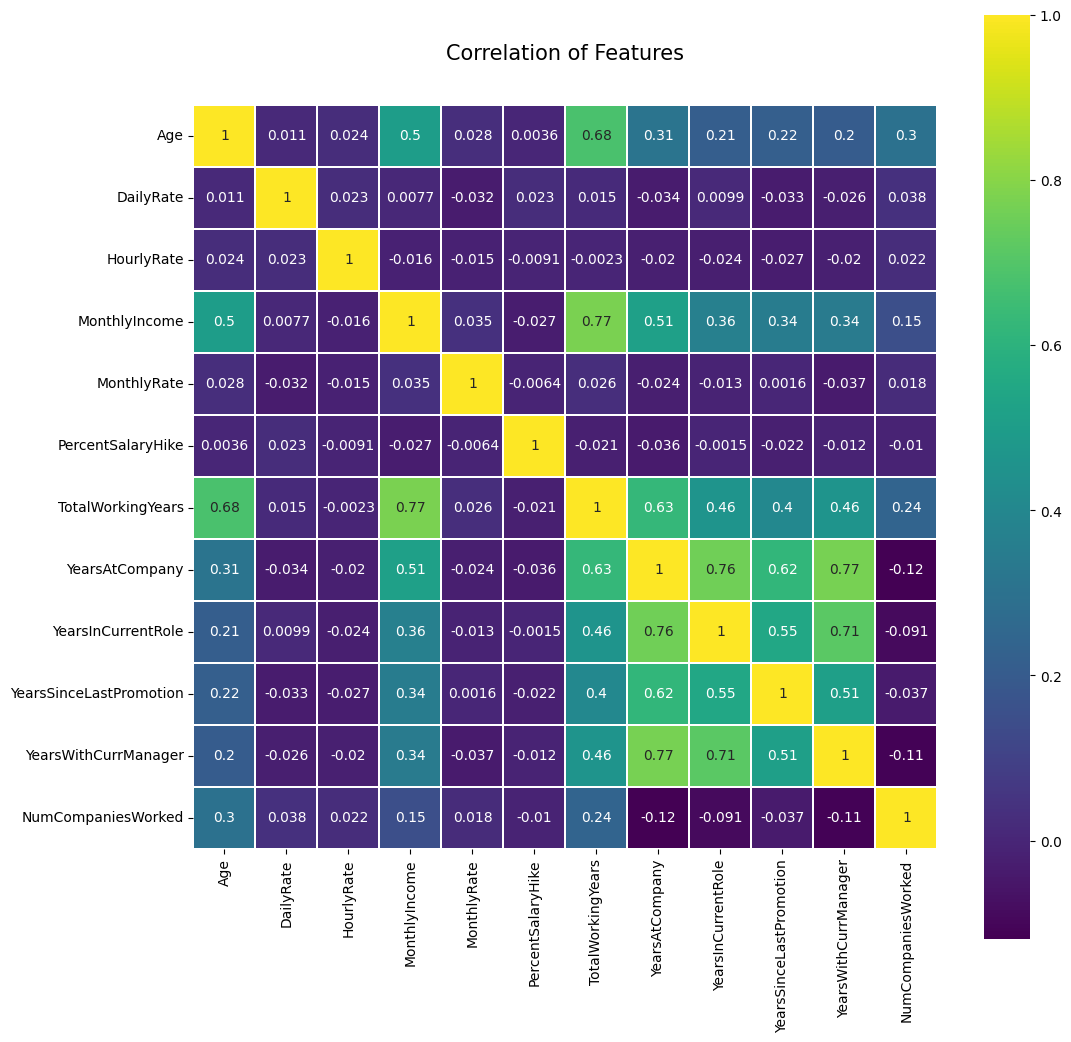

In [153]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data_n.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [154]:
emp_df_copy.shape

(1470, 35)

In [155]:
emp_df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,7,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,6,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,2,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,6,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,2,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [156]:
emp_df_copy['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [157]:
lb = LabelEncoder()
emp_df_copy['BusinessTravel']=lb.fit_transform(emp_df_copy['BusinessTravel'])

In [158]:
lb = LabelEncoder()
emp_df_copy['Department']=lb.fit_transform(emp_df_copy['Department'])

In [159]:
lb = LabelEncoder()
emp_df_copy['EducationField']=lb.fit_transform(emp_df_copy['EducationField'])

In [160]:
lb = LabelEncoder()
emp_df_copy['MaritalStatus']=lb.fit_transform(emp_df_copy['MaritalStatus'])

In [161]:
emp_df_copy['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [162]:
emp_df_copy["Over18"] = emp_df_copy['Over18'].map({'Y':1, 'N':0})

In [163]:
emp_df_copy['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [164]:
emp_df_copy["OverTime"] = emp_df_copy['OverTime'].map({'Yes':1, 'No':0})

In [165]:

emp_df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [166]:
emp_df_copy.StandardHours.value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [167]:
emp_df_copy.StockOptionLevel.value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [168]:
emp_df_copy.drop(columns={'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'}, inplace=True)

In [169]:
emp_df_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [170]:
emp_df_copy.dtypes

Age                            int64
Attrition                   category
BusinessTravel                 int32
DailyRate                      int64
Department                     int32
DistanceFromHome               int64
Education                      int64
EducationField                 int32
EnvironmentSatisfaction        int64
Gender                         int32
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                        int32
JobSatisfaction                int64
MaritalStatus                  int32
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                       int64
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
Y

In [171]:
emp_df_copy['Attrition']=emp_df_copy['Attrition'].astype('int64')

In [172]:
emp_df_copy.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

In [173]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from imblearn.combine import SMOTEENN

In [174]:
import lime
from lime import lime_tabular
import shap


In [175]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [176]:
emp_df_copy.shape

(1470, 31)

In [177]:
x=emp_df_copy.drop('Attrition', axis=1)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [178]:
y=emp_df_copy['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [179]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

<BarContainer object of 2 artists>

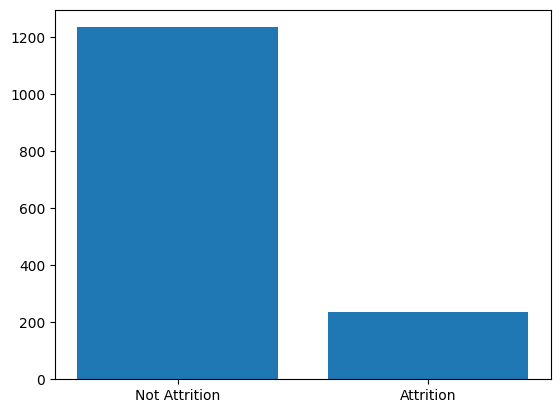

In [180]:
class_names = ['Not Attrition', 'Attrition']
plt.bar(class_names, y.value_counts())

In [181]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)

<BarContainer object of 2 artists>

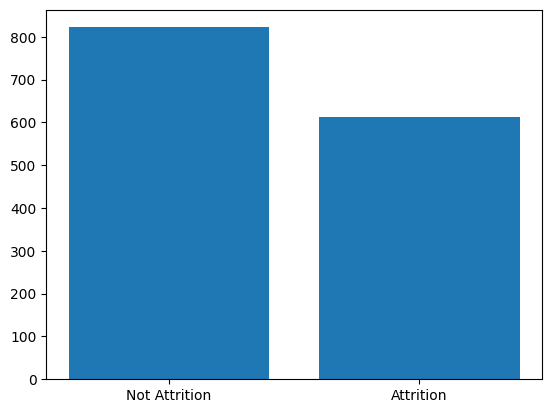

In [182]:
class_names = ['Not Attrition', 'Attrition']
plt.bar(class_names, y_resampled.value_counts())

In [183]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [184]:
minmax_scaler=MinMaxScaler()
standard_scaler=StandardScaler()

In [185]:
standard_scaler_fit=standard_scaler.fit(xr_train)
xr_train=standard_scaler_fit.transform(xr_train)
xr_test=standard_scaler_fit.transform(xr_test)

In [186]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

In [187]:
model_lor = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Creating the model on Training Data
model_lor_fit=model_lor.fit(xr_train,yr_train)
model_lor_pred=model_lor_fit.predict(xr_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(yr_test, model_lor_pred))
print(metrics.confusion_matrix(yr_test, model_lor_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(yr_test, model_lor_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


              precision    recall  f1-score   support

           0       0.82      0.75      0.78       189
           1       0.82      0.87      0.84       242

    accuracy                           0.82       431
   macro avg       0.82      0.81      0.81       431
weighted avg       0.82      0.82      0.82       431

[[142  47]
 [ 31 211]]
Accuracy of the model on Testing Sample Data: 0.82


In [188]:
model_dt = DecisionTreeClassifier(criterion = "gini",random_state = 100, max_depth=10, min_samples_leaf=8)

# Creating the model on Training Data
model_dt_fit=model_dt.fit(xr_train,yr_train)
model_dt_pred=model_dt_fit.predict(xr_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(yr_test, model_dt_pred))
print(metrics.confusion_matrix(yr_test, model_dt_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(yr_test, model_dt_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       189
           1       0.84      0.81      0.83       242

    accuracy                           0.81       431
   macro avg       0.80      0.81      0.81       431
weighted avg       0.81      0.81      0.81       431

[[151  38]
 [ 45 197]]
Accuracy of the model on Testing Sample Data: 0.81


In [189]:
model_rf = RandomForestClassifier(max_depth=12, n_estimators=200, criterion='entropy')

# Creating the model on Training Data
model_rf_fit=model_rf.fit(xr_train,yr_train)
model_rf_pred=model_rf_fit.predict(xr_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(yr_test, model_rf_pred))
print(metrics.confusion_matrix(yr_test, model_rf_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(yr_test, model_rf_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       189
           1       0.94      0.94      0.94       242

    accuracy                           0.93       431
   macro avg       0.93      0.93      0.93       431
weighted avg       0.93      0.93      0.93       431

[[174  15]
 [ 14 228]]
Accuracy of the model on Testing Sample Data: 0.93


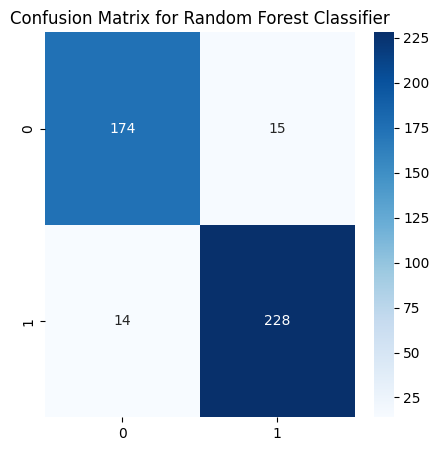

In [190]:
cm_rf = confusion_matrix(yr_test, model_rf_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for Random Forest Classifier')

plt.show()

In [191]:
dt=DecisionTreeClassifier(max_depth=8)
model_ada = AdaBoostClassifier(n_estimators=200, estimator=dt ,learning_rate=0.04)

# Creating the model on Training Data
model_ada_fit=model_ada.fit(xr_train,yr_train)
model_ada_pred=model_ada_fit.predict(xr_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(yr_test, model_ada_pred))
print(metrics.confusion_matrix(yr_test, model_ada_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(yr_test, model_ada_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       189
           1       0.90      0.90      0.90       242

    accuracy                           0.89       431
   macro avg       0.89      0.89      0.89       431
weighted avg       0.89      0.89      0.89       431

[[166  23]
 [ 25 217]]
Accuracy of the model on Testing Sample Data: 0.89


In [192]:
model_xgb = XGBClassifier(max_depth=15, learning_rate=0.06, n_estimators=150, objective='binary:logistic', booster='gbtree')

# Creating the model on Training Data
model_xgb_fit=model_xgb.fit(xr_train,yr_train)
model_xgb_pred=model_xgb_fit.predict(xr_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(yr_test, model_xgb_pred))
print(metrics.confusion_matrix(yr_test, model_xgb_pred))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(yr_test, model_xgb_pred, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       189
           1       0.92      0.93      0.93       242

    accuracy                           0.92       431
   macro avg       0.92      0.92      0.92       431
weighted avg       0.92      0.92      0.92       431

[[170  19]
 [ 16 226]]
Accuracy of the model on Testing Sample Data: 0.92


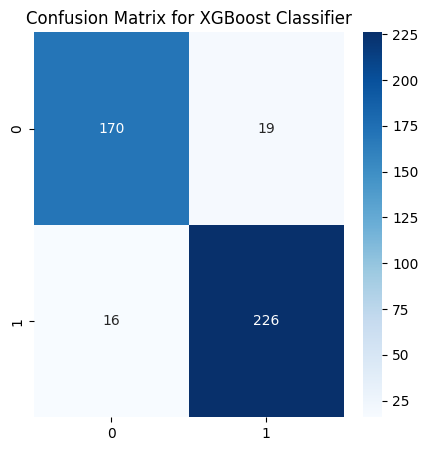

In [193]:
cm_xgb = confusion_matrix(yr_test, model_xgb_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix for XGBoost Classifier')

plt.show()